# Problem 4 Plots

Data is uploaded to S3 after each training run. We can download them and plot the data.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

def plot_loss(ax: matplotlib.axes.Axes, data: pd.DataFrame) -> None:
    ax.plot(data['step'], data['training_loss'],
            label='training', c=plt.cm.Set1(0))
    ax.plot(data['step'], data['test_loss'],
            label='test', c=plt.cm.Set1(1))
    ax.plot(data['step'], data['validation_loss'],
            label='validation', c=plt.cm.Set1(2))
    ax.set_xlabel('Steps')
    ax.set_ylabel('Cross-entropy')
    ax.grid(True)
    ax.legend(title="Dataset", loc='upper right')
    
def plot_average_precision_score(ax: matplotlib.axes.Axes, data: pd.DataFrame) -> None:
    ax.plot(data['step'], data['training_average_precision_score'],
            label='training', c=plt.cm.Set1(0))
    ax.plot(data['step'], data['test_average_precision_score'],
            label='test', c=plt.cm.Set1(1))
    ax.plot(data['step'], data['validation_average_precision_score'],
            label='validation', c=plt.cm.Set1(2))
    ax.set_xlabel('Steps')
    ax.set_ylabel('Average Precision Score')
    ax.grid(True)
    ax.legend(title="Dataset", loc='lower right')
    
def summarize_training_run(data):
    loss = data[['training_loss', 'validation_loss', 'test_loss']].min()
    average_precision_score = data[['training_average_precision_score',
                                    'validation_average_precision_score',
                                    'test_average_precision_score']].max()
    return pd.DataFrame({'Loss': loss.tolist(),
                         'Average Precision Score': average_precision_score.tolist()},
                        index=['Training', 'Validation', 'Test'])

## Training with SGD

In [2]:
from cse547.s3 import deserialize_object

linear_training_run_sgd = deserialize_object('cse-547', 'hw2/train/42de705f-9d91-4c3e-aa2f-c3f1cc91ea1c.pkl')
mlp_training_run_sgd = deserialize_object('cse-547', 'hw2/train/442a7cc0-946a-4d86-a09f-788b99f8ff3e.pkl')

In [3]:
evaluation_data_linear_sgd = pd.DataFrame(linear_training_run_sgd['evaluations'])
evaluation_data_mlp_sgd = pd.DataFrame(mlp_training_run_sgd['evaluations'])

In [4]:
print(summarize_training_run(evaluation_data_linear_sgd).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Average Precision Score &      Loss \\
\midrule
Training   &                 0.871461 &  0.122861 \\
Validation &                 0.563140 &  0.199776 \\
Test       &                 0.636070 &  0.177882 \\
\bottomrule
\end{tabular}



In [5]:
print(summarize_training_run(evaluation_data_mlp_sgd).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Average Precision Score &      Loss \\
\midrule
Training   &                 0.708156 &  0.157085 \\
Validation &                 0.565152 &  0.190817 \\
Test       &                 0.596515 &  0.181875 \\
\bottomrule
\end{tabular}



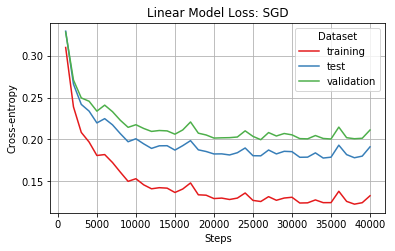

In [6]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_loss(ax, evaluation_data_linear_sgd)
ax.set_title('Linear Model Loss: SGD')
fig.savefig('linear_loss_sgd.pdf', bbox_inches='tight')

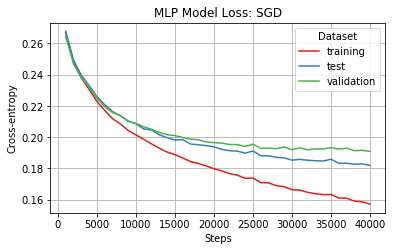

In [7]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_loss(ax, evaluation_data_mlp_sgd)
ax.set_title('MLP Model Loss: SGD')
fig.savefig('mlp_loss_sgd.pdf', bbox_inches='tight')

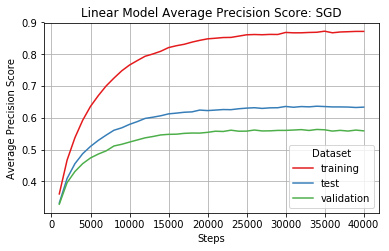

In [8]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_average_precision_score(ax, evaluation_data_linear_sgd)
ax.set_title('Linear Model Average Precision Score: SGD')
fig.savefig('linear_average_precision_score_sgd.pdf', bbox_inches='tight')

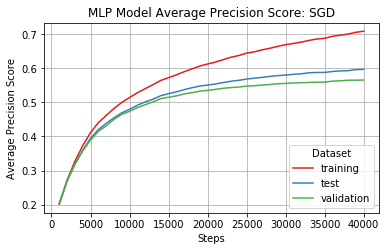

In [9]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_average_precision_score(ax, evaluation_data_mlp_sgd)
ax.set_title('MLP Model Average Precision Score: SGD')
fig.savefig('mlp_average_precision_score_sgd.pdf', bbox_inches='tight')

## Training with Nesterov's Momentum

In [10]:
linear_training_run_nesterov = deserialize_object('cse-547', 'hw2/train/b1d26136-d7ee-4a82-a22c-2fc5a8f5e14c.pkl')
mlp_training_run_nesterov = deserialize_object('cse-547', 'hw2/train/51f23524-476b-42c0-b605-f9e47435b131.pkl')

In [11]:
evaluation_data_linear_nesterov = pd.DataFrame(linear_training_run_nesterov['evaluations'])
evaluation_data_mlp_nesterov = pd.DataFrame(mlp_training_run_nesterov['evaluations'])

In [12]:
print(summarize_training_run(evaluation_data_linear_nesterov).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Average Precision Score &      Loss \\
\midrule
Training   &                 0.759774 &  0.170063 \\
Validation &                 0.521453 &  0.262688 \\
Test       &                 0.581486 &  0.232664 \\
\bottomrule
\end{tabular}



In [13]:
print(summarize_training_run(evaluation_data_mlp_nesterov).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Average Precision Score &      Loss \\
\midrule
Training   &                 0.793293 &  0.141046 \\
Validation &                 0.587959 &  0.188455 \\
Test       &                 0.629526 &  0.177171 \\
\bottomrule
\end{tabular}



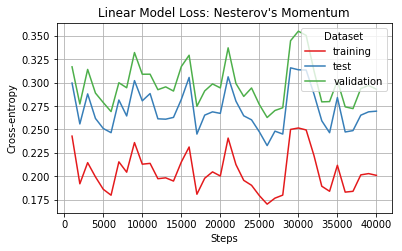

In [14]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_loss(ax, evaluation_data_linear_nesterov)
ax.set_title('Linear Model Loss: Nesterov\'s Momentum')
fig.savefig('linear_loss_nesterov.pdf', bbox_inches='tight')

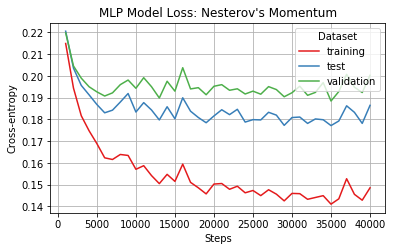

In [15]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_loss(ax, evaluation_data_mlp_nesterov)
ax.set_title('MLP Model Loss: Nesterov\'s Momentum')
fig.savefig('mlp_loss_nesterov.pdf', bbox_inches='tight')

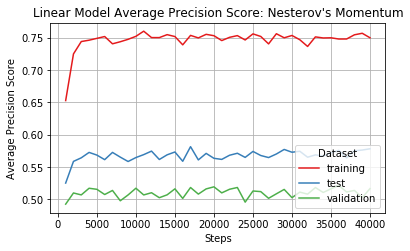

In [16]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_average_precision_score(ax, evaluation_data_linear_nesterov)
ax.set_title('Linear Model Average Precision Score: Nesterov\'s Momentum')
fig.savefig('linear_average_precision_score_nesterov.pdf', bbox_inches='tight')

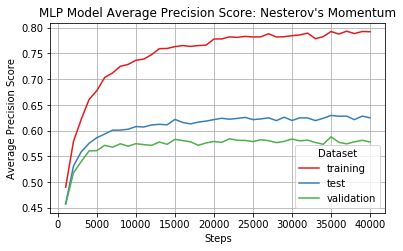

In [17]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_average_precision_score(ax, evaluation_data_mlp_nesterov)
ax.set_title('MLP Model Average Precision Score: Nesterov\'s Momentum')
fig.savefig('mlp_average_precision_score_nesterov.pdf', bbox_inches='tight')

## Training with Adagrad

In [18]:
linear_training_run_adagrad = deserialize_object('cse-547', 'hw2/train/4176c84e-3e66-4adc-b88a-fbd04438147d.pkl')
mlp_training_run_adagrad = deserialize_object('cse-547', 'hw2/train/ea12e8f8-993f-467f-a577-85164859f1ae.pkl')

In [19]:
evaluation_data_linear_adagrad = pd.DataFrame(linear_training_run_adagrad['evaluations'])
evaluation_data_mlp_adagrad = pd.DataFrame(mlp_training_run_adagrad['evaluations'])

In [20]:
print(summarize_training_run(evaluation_data_linear_adagrad).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Average Precision Score &      Loss \\
\midrule
Training   &                 0.820442 &  0.136633 \\
Validation &                 0.542389 &  0.204523 \\
Test       &                 0.609165 &  0.184826 \\
\bottomrule
\end{tabular}



In [21]:
print(summarize_training_run(evaluation_data_mlp_adagrad).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Average Precision Score &      Loss \\
\midrule
Training   &                 0.605249 &  0.186454 \\
Validation &                 0.531518 &  0.199406 \\
Test       &                 0.546195 &  0.196277 \\
\bottomrule
\end{tabular}



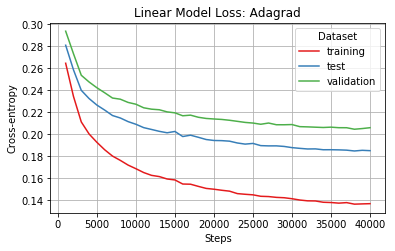

In [22]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_loss(ax, evaluation_data_linear_adagrad)
ax.set_title('Linear Model Loss: Adagrad')
fig.savefig('linear_loss_adagrad.pdf', bbox_inches='tight')

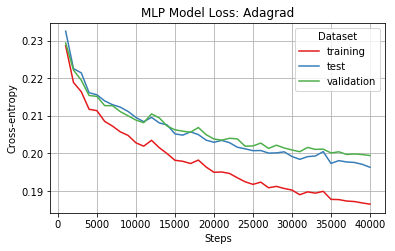

In [23]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_loss(ax, evaluation_data_mlp_adagrad)
ax.set_title('MLP Model Loss: Adagrad')
fig.savefig('mlp_loss_adagrad.pdf', bbox_inches='tight')

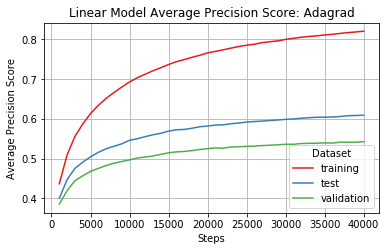

In [24]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_average_precision_score(ax, evaluation_data_linear_adagrad)
ax.set_title('Linear Model Average Precision Score: Adagrad')
fig.savefig('linear_average_precision_score_adagrad.pdf', bbox_inches='tight')

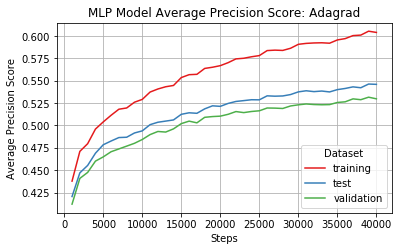

In [25]:
fig = plt.figure(figsize=(6,3.5))
ax = fig.gca()
plot_average_precision_score(ax, evaluation_data_mlp_adagrad)
ax.set_title('MLP Model Average Precision Score: Adagrad')
fig.savefig('mlp_average_precision_score_adagrad.pdf', bbox_inches='tight')